##### The data set used in this project was downloaded from the UCI Machine Learning Repository. The data set consist of health news from various top news agencies on twitter.
##### The first stage of the project was the use of Unsupervised Learning for putting the tweets into groups/clusters. Which was then used as the target variables for the classification stage(Supervised Learning).
##### K-Means was used for Clustering due to its simplicity and for Classifiaction a Neural Network was used because of its efficiency

# CLUSTERING

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
import string
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.corpus import stopwords
from glob import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
# function for importing the .txt files
def import_txt_files(route):
    dataframe = pd.read_csv(route, sep="|", header=None, names=["id", "timestamp", "tweet"],
                            encoding="mac_latin2", on_bad_lines="skip")
    return dataframe

In [6]:
# function for removing unwanted characters from the tweet column
def preprocess_dataframe(dataf):
    dataf["tweet"] = dataf["tweet"].str.replace("RT ", " ") # remove RT tag
    dataf["tweet"] = dataf["tweet"].str.replace("\&\w*;", " ", regex=True) # Remove any special characters starting with '&' in the tweet column
    dataf["tweet"] = dataf["tweet"].str.replace("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d+)",
                                                " ", regex=True) # remove mentions, special characters, URLs, and digits
    dataf["tweet"] = dataf["tweet"].str.rstrip(" ") # removes any trailing whitespace at the right end
    dataf["tweet"] = dataf["tweet"].str.lstrip(" ") # removes any leading whitespace at the left end
    
    return dataf

In [7]:
# importing the files
files = glob("./Health-Tweets/*.txt")
files

['./Health-Tweets\\bbchealth.txt',
 './Health-Tweets\\cbchealth.txt',
 './Health-Tweets\\cnnhealth.txt',
 './Health-Tweets\\everydayhealth.txt',
 './Health-Tweets\\foxnewshealth.txt',
 './Health-Tweets\\gdnhealthcare.txt',
 './Health-Tweets\\goodhealth.txt',
 './Health-Tweets\\KaiserHealthNews.txt',
 './Health-Tweets\\latimeshealth.txt',
 './Health-Tweets\\msnhealthnews.txt',
 './Health-Tweets\\NBChealth.txt',
 './Health-Tweets\\nprhealth.txt',
 './Health-Tweets\\nytimeshealth.txt',
 './Health-Tweets\\reuters_health.txt',
 './Health-Tweets\\usnewshealth.txt',
 './Health-Tweets\\wsjhealth.txt']

In [8]:
# concatenating the files
df = pd.concat([import_txt_files(file) for file in files])
df.head()

id                       timestamp  \
0  585978391360221184  Thu Apr 09 01:31:50 +0000 2015   
1  585947808772960257  Wed Apr 08 23:30:18 +0000 2015   
2  585947807816650752  Wed Apr 08 23:30:18 +0000 2015   
3  585866060991078401  Wed Apr 08 18:05:28 +0000 2015   
4  585794106170839041  Wed Apr 08 13:19:33 +0000 2015   

                                               tweet  
0  Breast cancer risk test devised http://bbc.in/...  
1  GP workload harming care - BMA poll http://bbc...  
2  Short people's 'heart risk greater' http://bbc...  
3  New approach against HIV 'promising' http://bb...  
4  Coalition 'undermined NHS' - doctors http://bb...

In [9]:
# shape of the data set
df.shape

(62817, 3)

In [10]:
# applying the preprocess_dataframe function on the dataset
preprocessed_dataset = preprocess_dataframe(df)
preprocessed_dataset.head()

id                       timestamp  \
0  585978391360221184  Thu Apr 09 01:31:50 +0000 2015   
1  585947808772960257  Wed Apr 08 23:30:18 +0000 2015   
2  585947807816650752  Wed Apr 08 23:30:18 +0000 2015   
3  585866060991078401  Wed Apr 08 18:05:28 +0000 2015   
4  585794106170839041  Wed Apr 08 13:19:33 +0000 2015   

                                  tweet  
0       Breast cancer risk test devised  
1   GP workload harming care   BMA poll  
2    Short people s  heart risk greater  
3   New approach against HIV  promising  
4  Coalition  undermined NHS    doctors

In [11]:
# Shuffling the dataset
preprocessed_dataset = preprocessed_dataset.sample(frac=1, ignore_index=True, random_state=32)
preprocessed_dataset.head()

id                       timestamp  \
0  569754588426866688  Mon Feb 23 07:04:14 +0000 2015   
1  426443125007994881  Thu Jan 23 19:55:38 +0000 2014   
2  328726300128841728  Mon Apr 29 04:23:52 +0000 2013   
3  281383746584862722  Wed Dec 19 13:01:27 +0000 2012   
4  540989229728538624  Fri Dec 05 22:00:58 +0000 2014   

                                               tweet  
0  New  I start the day with anti depressants and...  
1  of Canadians want to choose where they die  po...  
2                    Well  An Exam With Poor Results  
3           Anarchist Soccer Mom  cries out for help  
4      Canada hopes bird flu is contained to   farms

In [12]:
def get_top_100_words(data, display=False):
    """display the top 100 most frequent words"""
    
    # Split the text into words and create a Series
    words = data.str.split().explode()
    # Count the frequency of each word
    word_counts = words.value_counts()
    # Create a new DataFrame with the top 100 most frequent words and their counts
    top_100_words = word_counts.head(100).reset_index(name='count')
    
    if display:
        # display the words frequencies before stopwords removal
        return px.bar(x=top_100_words["tweet"], y=top_100_words["count"], data_frame=top_100_words,
                       color=top_100_words["count"], color_continuous_scale="Jet", text=top_100_words["tweet"],
                       title="Top 100 Most Frequent Words")
    else:
        return top_100_words

In [13]:
# display the words frequencies before stopwords removal
get_top_100_words(preprocessed_dataset["tweet"], display=True)

In [ ]:
# stopwords
stopwords = stopwords.words("english")
stopwords

In [ ]:
# list of custom stopwords
new_stopwords = ["new", "say", "like", "ways", "make", "says", "video", "day", "try", "use", "year", "today",
                 "need", "know", "report", "plan", "plans", "big", "help", "take", "see", "may", "get", "costs",
                 "care", "deal","sector","tell", "suspected", "india", "wants","california", "cost", "happy",
                 "help", "risk", "drug", "well", "via", "one", "could", "people", "kids", "finds", "fast",
                 "good", "life", "time", "works", "work", "reports", "best", "many", "want", "linked", "still",
                 "back", "tips", "high", "might", "week", "loss", "find", "linked", "sign", "cost", "first", 
                 "need","every", "cases","officials","exchange","exchanges","toll","ways","work", "airport",
                 "say","like","sign", "eating", "even", "likely", "read", "years", "start", "easy", "early",
                 "news", "things", "shows", "long", "join", "would", "look", "getting", "think", "much", "keep",
                 "free", "common", "world", "states", "great", "stop", "thanks", "without", "little", "change",
                 "watch", "next", "rules", "lose", "right", "really", "less", "questions", "better", "canada",
                 "study", "must", "last", "weekend", "rates", "state", "give", "data", "last", "lower", "helps",
                 "going", "problems", "call", "raises", "raise", "gets", "get", "among", "stay","first", " rt ",
                 "latest", "show", "could", "holiday", "miss", "found", "awaits", "helping", "seats", "story",
                 "rushes", "makes","sharing", "looking", "worst", "swaps", "choices", "training", "west",
                 "strict", "treat", "diet", "higher", "fight", "fighting", "newsletter", "second", "moves",
                 "newsletters", "working", "headlines", "tied", "fall", "step",  "longer", "list", "possible", 
                 "contain", "making", "house", "support", "talk", "million", "atlanta", "texas", "millions",
                 "avoid", "survivors", "survivor", "death", "fear", "chief", "small", "body", "medical", "home", 
                 "victim", "spanish", "declares", "dies", "team", "british", "dallas", "online", "thousands",
                 "trial", "home", "check", "cause", "face", "daily", "staff", "share", "feel", "hundreds",
                 "improve", "american", "deaths", "death", "america", "americans", "blog", "case","changes",
                 "changing", "http", "got", "way", "two", "let"]

In [ ]:
stopwords.extend(new_stopwords)
stopwords

In [ ]:
#define a function to get rid of stopwords present in the messages
def remove_stopwords(tweet):
    clean_words = [word.lower() for word in tweet.split() if word.lower() not in stopwords and len(word)>=3]
    return " ".join(clean_words)

In [ ]:
# apply the remove_stopwords function
preprocessed_dataset['tweet'] = preprocessed_dataset['tweet'].apply(remove_stopwords)

In [ ]:
# display the words frequencies after stopwords removal
get_top_100_words(preprocessed_dataset["tweet"], display=True)

In [17]:
# lemmatizing function
wnl = WordNetLemmatizer()
def lemmatizer(tweet):
    lemmatized_words = [wnl.lemmatize(word) for word in word_tokenize(tweet)]
    return " ".join(lemmatized_words)

In [18]:
# using WordNetLemmatizer
preprocessed_dataset["tweet"] = preprocessed_dataset["tweet"].apply(lemmatizer)
preprocessed_dataset.head()

id                       timestamp  \
0  569754588426866688  Mon Feb 23 07:04:14 +0000 2015   
1  426443125007994881  Thu Jan 23 19:55:38 +0000 2014   
2  328726300128841728  Mon Apr 29 04:23:52 +0000 2013   
3  281383746584862722  Wed Dec 19 13:01:27 +0000 2012   
4  540989229728538624  Fri Dec 05 22:00:58 +0000 2014   

                                               tweet  
0  anti depressant end wishing nh payroll viewsfr...  
1                           canadian choose die poll  
2                                   exam poor result  
3                           anarchist soccer mom cry  
4                       hope bird flu contained farm

In [19]:
# feature extraction using TF-IDF
vectorizer = TfidfVectorizer(stop_words=stopwords, analyzer="word",
                             min_df=2, max_df=0.5, tokenizer=word_tokenize)
features = vectorizer.fit_transform(preprocessed_dataset["tweet"])

In [20]:
features.shape

(62817, 13466)

In [21]:
# dimensionality reduction using TruncatedSVD since we are dealing with sparse matrix
svd = TruncatedSVD(100)
pipeline = make_pipeline(svd, Normalizer())
reduced_features = pipeline.fit_transform(features)

In [22]:
reduced_features.shape

(62817, 100)

## Model Training

In [23]:
k_range = range(1,25)
sse = []
for k in k_range:
    km =KMeans(n_clusters=k)
    km.fit(reduced_features)
    sse.append(km.inertia_)

Text(0, 0.5, 'sum of square error')

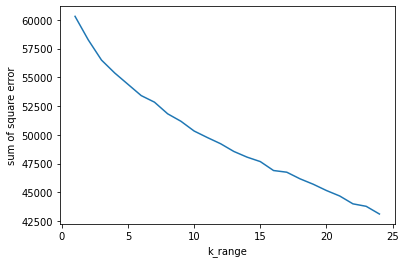

In [24]:
plt.plot(k_range,sse)
plt.xlabel("k_range")
plt.ylabel("sum of square error")

*I used the elbow technique to choose the number of clusters*

In [37]:
num_clusters = 5
km = KMeans(num_clusters, max_iter=100)
clusters = km.fit_predict(reduced_features)

## visualisation
#### I used  only the first 3000 samples for visualization

In [38]:
# dimensionality reduction for visualisation
pca = PCA(n_components=2)
v_reduced_feature = pca.fit_transform(features[:3000].toarray())

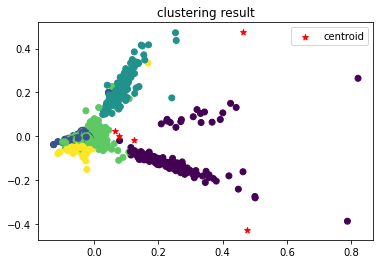

In [39]:
plt.scatter(v_reduced_feature[:,0], v_reduced_feature[:,1], c=clusters[:3000], cmap="viridis")
plt.scatter(km.cluster_centers_[:,0],  km.cluster_centers_[:,1], color="red", marker="*", label="centroid")
plt.title("clustering result")
plt.legend(loc="upper right")


Most discriminative words per cluster:
Cluster 0: 


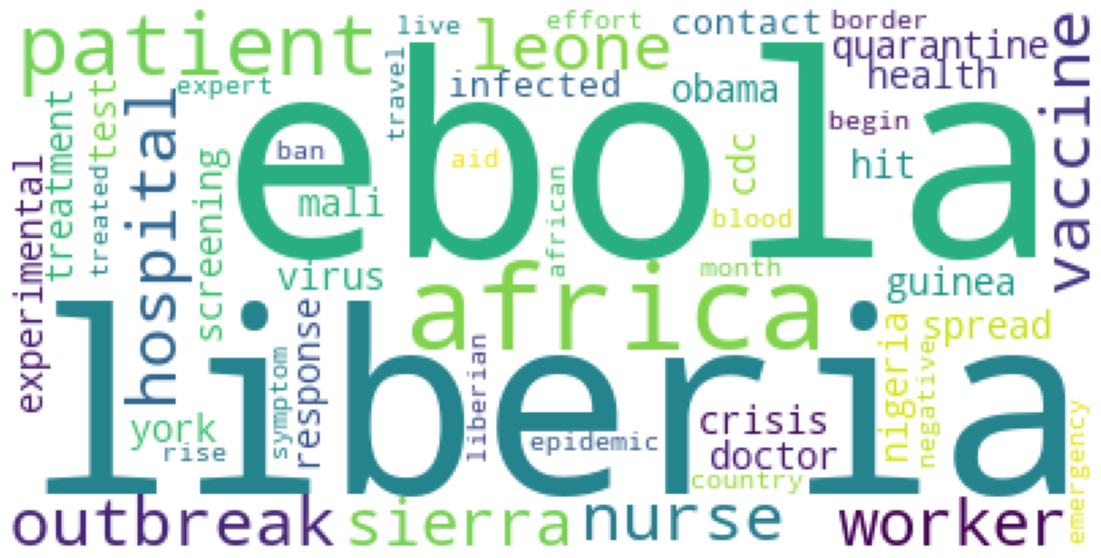





Cluster 1: 


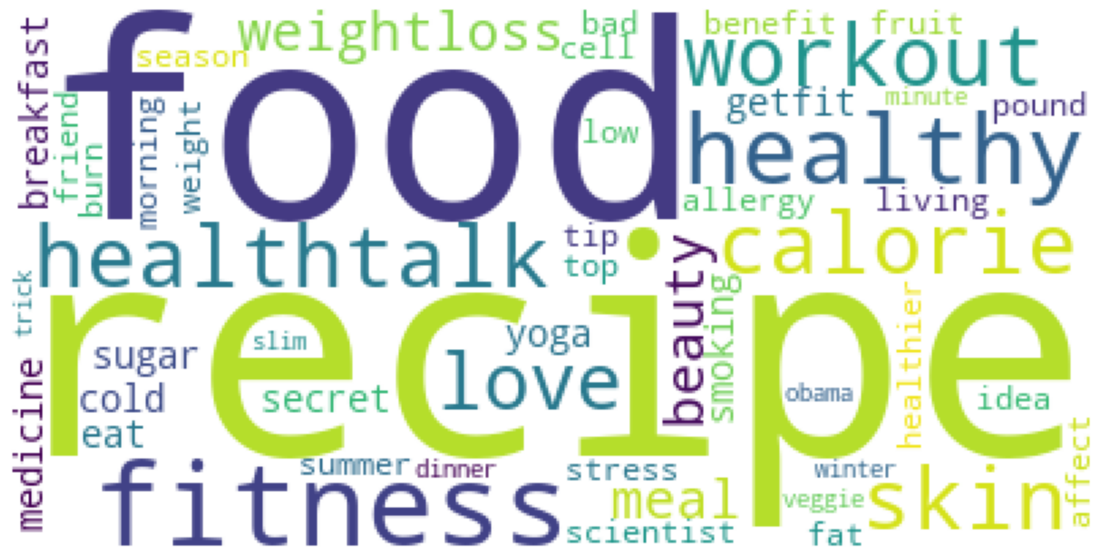





Cluster 2: 


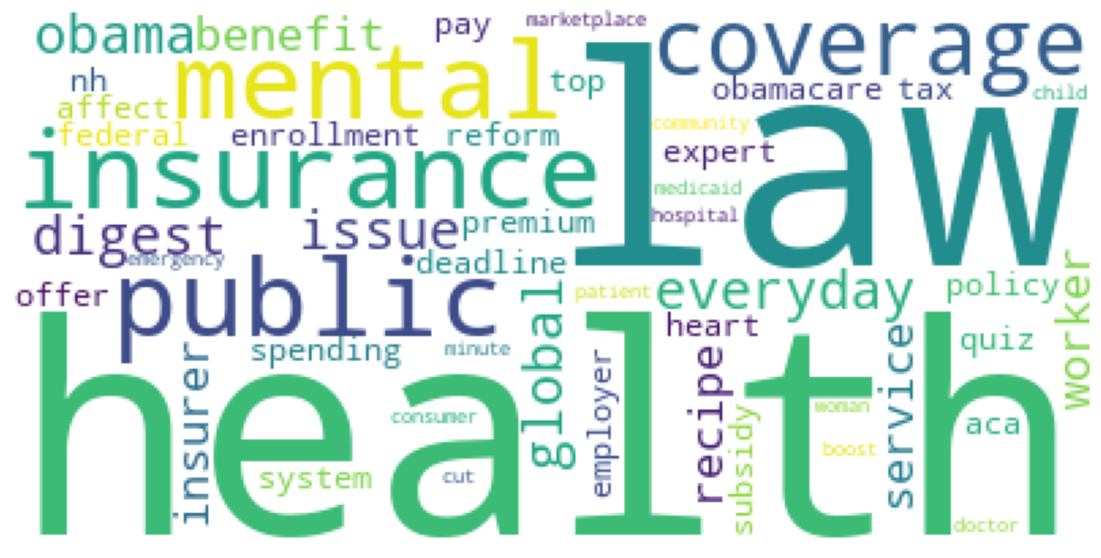





Cluster 3: 


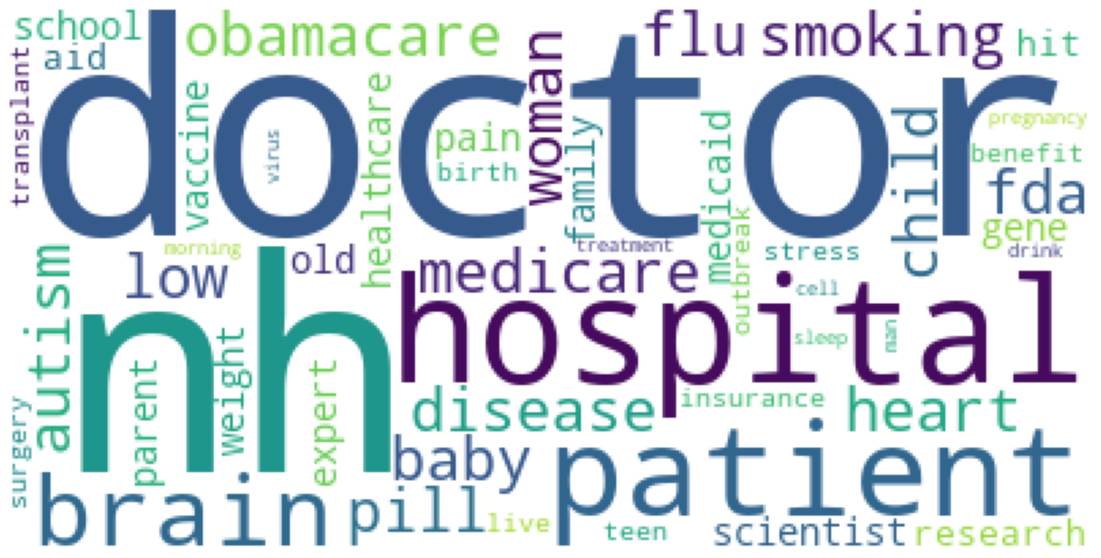





Cluster 4: 


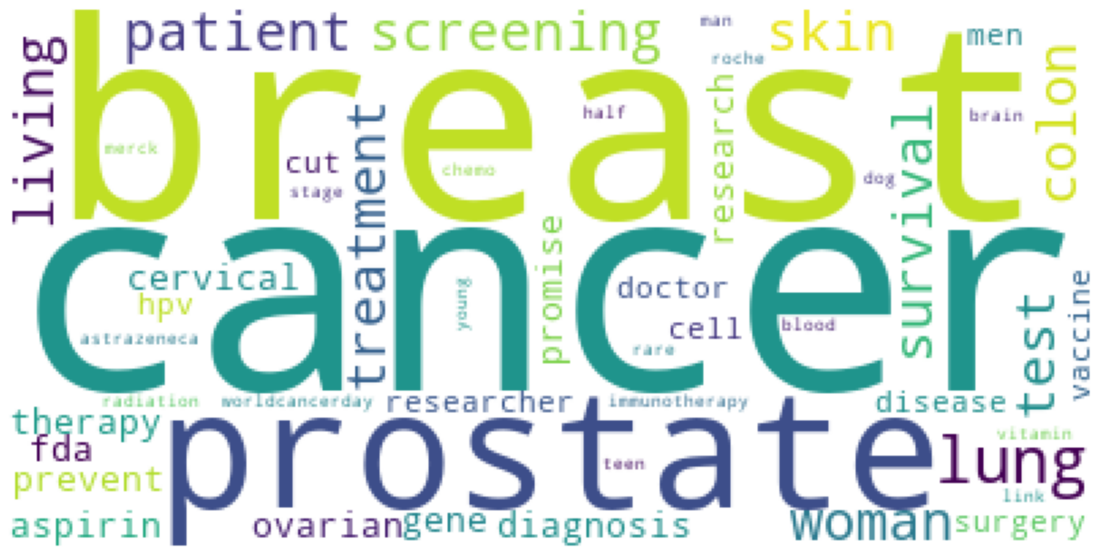

In [40]:
def evaluate(km, svd, num_clusters):
    print("\nMost discriminative words per cluster:")
    original_space_centroids = svd.inverse_transform(km.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()
    for i in range(num_clusters):
        print("Cluster " + str(i) + ": ")
        cl_terms = ""
        for ind in order_centroids[i, :50]:
            cl_terms += terms[ind] + " "
            
        wordcloud = WordCloud(collocations=False, background_color="white").generate_from_text(cl_terms)
        plt.figure(figsize=(20,10))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()
        print("\n\n\n")
evaluate(km, svd, num_clusters)

In [41]:
# assigning the predicted clusters to the tweets
preprocessed_dataset["cluster"] = clusters
preprocessed_dataset.head()

id                       timestamp  \
0  569754588426866688  Mon Feb 23 07:04:14 +0000 2015   
1  426443125007994881  Thu Jan 23 19:55:38 +0000 2014   
2  328726300128841728  Mon Apr 29 04:23:52 +0000 2013   
3  281383746584862722  Wed Dec 19 13:01:27 +0000 2012   
4  540989229728538624  Fri Dec 05 22:00:58 +0000 2014   

                                               tweet  cluster  
0  anti depressant end wishing nh payroll viewsfr...        3  
1                           canadian choose die poll        3  
2                                   exam poor result        3  
3                           anarchist soccer mom cry        3  
4                       hope bird flu contained farm        3

In [42]:
preprocessed_dataset[preprocessed_dataset["cluster"] == 0].head()

id                       timestamp  \
26  520286865837260800  Thu Oct 09 18:57:09 +0000 2014   
32  511738111814938624  Tue Sep 16 04:47:28 +0000 2014   
37  525653634168532992  Fri Oct 24 14:22:47 +0000 2014   
50  517341464255533056  Wed Oct 01 15:53:11 +0000 2014   
80  527382524532916224  Wed Oct 29 08:52:46 +0000 2014   

                                                tweet  cluster  
26  republican senator undecided ebola funding inc...        0  
32                   military send battle ebola virus        0  
37  ebola epidemic reach african country mali anno...        0  
50                  timeline man ebola arrival united        0  
80          charity group launch appeal ebola disease        0

In [43]:
preprocessed_dataset[preprocessed_dataset["cluster"] == 1].head()

id                       timestamp  \
11  563696172637126657  Fri Feb 06 13:50:15 +0000 2015   
13  585850996666068993  Wed Apr 08 17:05:36 +0000 2015   
19  539549025335136256  Mon Dec 01 22:38:06 +0000 2014   
20  260538096985186304  Tue Oct 23 00:28:17 +0000 2012   
23  567496305799626752  Tue Feb 17 01:30:37 +0000 2015   

                                   tweet  cluster  
11                 follow ranked easiest        1  
13  medicine computer probably man thank        1  
19                       feeling glutton        1  
20      pediatrician advise organic food        1  
23                                  pick        1

In [44]:
preprocessed_dataset[preprocessed_dataset["cluster"] == 2].head()

id                       timestamp  \
8   396501160737374208  Sat Nov 02 04:56:58 +0000 2013   
21  456432450839646208  Wed Apr 16 14:02:31 +0000 2014   
36  499223447248314369  Tue Aug 12 15:58:39 +0000 2014   
39  319495665879224320  Wed Apr 03 17:04:37 +0000 2013   
59  324205113348616192  Tue Apr 16 16:58:17 +0000 2013   

                                                tweet  cluster  
8                       practice health month checkup        2  
21  insurer seeing health law brightside enrollmen...        2  
36  recipe health cold steamed petrale sole uncook...        2  
39           administration hit pause health business        2  
59                                 health sale magnet        2

In [45]:
preprocessed_dataset[preprocessed_dataset["cluster"] == 3].head()

id                       timestamp  \
0  569754588426866688  Mon Feb 23 07:04:14 +0000 2015   
1  426443125007994881  Thu Jan 23 19:55:38 +0000 2014   
2  328726300128841728  Mon Apr 29 04:23:52 +0000 2013   
3  281383746584862722  Wed Dec 19 13:01:27 +0000 2012   
4  540989229728538624  Fri Dec 05 22:00:58 +0000 2014   

                                               tweet  cluster  
0  anti depressant end wishing nh payroll viewsfr...        3  
1                           canadian choose die poll        3  
2                                   exam poor result        3  
3                           anarchist soccer mom cry        3  
4                       hope bird flu contained farm        3

In [46]:
preprocessed_dataset[preprocessed_dataset["cluster"]==4].head()

id                       timestamp  \
56   464379510432210944  Thu May 08 12:21:17 +0000 2014   
60   507287777252102144  Wed Sep 03 22:03:25 +0000 2014   
148  155340272354594818  Fri Jan 06 17:29:41 +0000 2012   
168  535250564947660800  Thu Nov 20 01:57:33 +0000 2014   
177  446483550427041792  Thu Mar 20 03:09:08 +0000 2014   

                                                 tweet  cluster  
56                    puppy love test power dog cancer        4  
60   uninformed breast cancer patient apt consider ...        4  
148                   resolve colon cancer test expert        4  
168                   double cancer referral gps urged        4  
177                 dna test detects colon cancer rate        4

# CLASSIFICATION

## Feature Engineering

In [47]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, TextVectorization, Conv1D, Dropout, Flatten, Activation
from tensorflow.keras.layers import GlobalMaxPooling1D, MaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
preprocessed_dataset["cluster"].value_counts()

cluster
3    39332
1    11844
2     4842
0     4368
4     2431
Name: count, dtype: int64

In [49]:
# grouping the data by cluster value and picking the only 5000 from columns that are over 5000
cluster_0 = preprocessed_dataset[preprocessed_dataset["cluster"]==0]
cluster_1 = preprocessed_dataset[preprocessed_dataset["cluster"]==1][:5000]
cluster_2 = preprocessed_dataset[preprocessed_dataset["cluster"]==2]
cluster_3 = preprocessed_dataset[preprocessed_dataset["cluster"]==3][:5000]
cluster_4 = preprocessed_dataset[preprocessed_dataset["cluster"]==4]

In [50]:
# creating a new dataframe from the various group of clusters and shuffling the datas to avoid bias
reshaped_dataset = pd.concat([cluster_0, cluster_1, cluster_2, cluster_3, cluster_4])
reshaped_dataset = reshaped_dataset.sample(frac=1, ignore_index=True, random_state=42)
reshaped_dataset.head()

id                       timestamp  \
0  294530995108077568  Thu Jan 24 19:43:56 +0000 2013   
1  383290402704343040  Thu Sep 26 18:02:07 +0000 2013   
2  279696873810448385  Fri Dec 14 21:18:25 +0000 2012   
3  524290614309830656  Mon Oct 20 20:06:37 +0000 2014   
4  388378563294285824  Thu Oct 10 19:00:39 +0000 2013   

                                               tweet  cluster  
0  consider water proof sweat resistance makeup s...        1  
1                            healthy french fry real        1  
2                                    punt health fed        2  
3                    quarantine contact ebola ending        0  
4                catcher fry mcdonald meal side book        1

In [51]:
X = reshaped_dataset.drop(["id", "timestamp", "cluster"], axis=1)
y = reshaped_dataset["cluster"]

In [52]:
y.value_counts()

cluster
1    5000
3    5000
2    4842
0    4368
4    2431
Name: count, dtype: int64

In [53]:
# number of tokens whose length are below 200
len([token for token in X["tweet"] if len(token)<=200])

21637

In [54]:
vocab_size = 1000
embed_dim = 300
maxlen = 200 # 200 is use as maxlen since the length of most of the X_train data is less than 200

In [55]:
ttokenizer = TextVectorization(max_tokens=vocab_size, output_sequence_length=maxlen)
ttokenizer.adapt(X["tweet"].tolist())
textv_model = Sequential()
textv_model.add(Input(shape=(1,), dtype=tf.string))
textv_model.add(ttokenizer)

In [56]:
X_seq_tv = textv_model.predict(X["tweet"])

677/677 [==============================] - 3s 2ms/step


In [57]:
X_seq_tv

array([[947, 407,   1, ...,   0,   0,   0],
       [ 11,   1,   1, ...,   0,   0,   0],
       [  1,   2, 672, ...,   0,   0,   0],
       ...,
       [103,  41, 866, ...,   0,   0,   0],
       [316, 332,   3, ...,   0,   0,   0],
       [  1, 401,   1, ...,   0,   0,   0]], dtype=int64)

In [58]:
ttokenizer.get_vocabulary()

['',
 '[UNK]',
 'health',
 'ebola',
 'cancer',
 'patient',
 'food',
 'law',
 'insurance',
 'hospital',
 'doctor',
 'healthy',
 'breast',
 'mental',
 'recipe',
 'woman',
 'outbreak',
 'test',
 'healthtalk',
 'nh',
 'worker',
 'africa',
 'liberia',
 'heart',
 'vaccine',
 'treatment',
 'nurse',
 'leone',
 'sierra',
 'workout',
 'calorie',
 'weight',
 'obama',
 'child',
 'virus',
 'fitness',
 'love',
 'eat',
 'cdc',
 'disease',
 'expert',
 'fat',
 'drug',
 'fda',
 'coverage',
 'brain',
 'exercise',
 'skin',
 'cut',
 'boost',
 'live',
 'spread',
 'benefit',
 'screening',
 'obamacare',
 'family',
 'issue',
 'public',
 'blood',
 'quarantine',
 'top',
 'prostate',
 'rise',
 'hit',
 'young',
 'aid',
 'global',
 'men',
 'response',
 'flu',
 'yoga',
 'old',
 'age',
 'minute',
 'crisis',
 'experimental',
 'service',
 'answer',
 'put',
 'offer',
 'research',
 'end',
 'pay',
 'school',
 'meal',
 'key',
 'system',
 'healthcare',
 'baby',
 'insurer',
 'guinea',
 'secret',
 'scientist',
 'lung',
 'whit

In [59]:
# Tokenize our training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<UNK>")
tokenizer.fit_on_texts(X["tweet"])
# Get our training data word index
word_index = tokenizer.word_index
# Encode training data sentences into sequences
X_sequences = tokenizer.texts_to_sequences(X["tweet"])
# Pad the training sequences
X_padded = pad_sequences(X_sequences, padding="post", truncating="post", maxlen=maxlen)

In [60]:
X_padded

array([[908, 407,   1, ...,   0,   0,   0],
       [ 11,   1,   1, ...,   0,   0,   0],
       [  1,   2, 656, ...,   0,   0,   0],
       ...,
       [104,  41, 885, ...,   0,   0,   0],
       [308, 329,   3, ...,   0,   0,   0],
       [  1, 401,   1, ...,   0,   0,   0]])

In [61]:
word_index

{'<UNK>': 1,
 'health': 2,
 'ebola': 3,
 'cancer': 4,
 'patient': 5,
 'food': 6,
 'law': 7,
 'insurance': 8,
 'hospital': 9,
 'doctor': 10,
 'healthy': 11,
 'breast': 12,
 'mental': 13,
 'recipe': 14,
 'woman': 15,
 'outbreak': 16,
 'test': 17,
 'healthtalk': 18,
 'nh': 19,
 'worker': 20,
 'africa': 21,
 'liberia': 22,
 'heart': 23,
 'vaccine': 24,
 'treatment': 25,
 'nurse': 26,
 'leone': 27,
 'sierra': 28,
 'workout': 29,
 'calorie': 30,
 'weight': 31,
 'obama': 32,
 'child': 33,
 'virus': 34,
 'fitness': 35,
 'eat': 36,
 'love': 37,
 'cdc': 38,
 'disease': 39,
 'expert': 40,
 'fat': 41,
 'drug': 42,
 'fda': 43,
 'coverage': 44,
 'brain': 45,
 'exercise': 46,
 'skin': 47,
 'boost': 48,
 'cut': 49,
 'live': 50,
 'spread': 51,
 'benefit': 52,
 'screening': 53,
 'obamacare': 54,
 'family': 55,
 'issue': 56,
 'blood': 57,
 'public': 58,
 'quarantine': 59,
 'top': 60,
 'prostate': 61,
 'rise': 62,
 'hit': 63,
 'aid': 64,
 'young': 65,
 'global': 66,
 'men': 67,
 'flu': 68,
 'response': 69

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.10, random_state=32)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (19476, 200)
y_train shape (19476,)
X_test shape (2165, 200)
y_test shape (2165,)


In [85]:
model = Sequential()
model.add(Embedding(vocab_size, embed_dim, input_length=maxlen, mask_zero=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_clusters, activation="softmax"))

In [86]:
model.compile(optimizer="adam", loss="SparseCategoricalCrossentropy", metrics=["accuracy"])

In [87]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 300)          300000    
                                                                 
 global_max_pooling1d_3 (Gl  (None, 300)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_7 (Dense)             (None, 128)               38528     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                      

In [88]:
model.fit(x=X_train, y=y_train, batch_size=50, validation_split=0.3, epochs=10, shuffle=True)

Epoch 1/10
273/273 [==============================] - 13s 42ms/step - loss: 0.6234 - accuracy: 0.7502 - val_loss: 0.1163 - val_accuracy: 0.9545
Epoch 2/10
273/273 [==============================] - 11s 40ms/step - loss: 0.1184 - accuracy: 0.9591 - val_loss: 0.0974 - val_accuracy: 0.9653
Epoch 3/10
273/273 [==============================] - 10s 36ms/step - loss: 0.0710 - accuracy: 0.9740 - val_loss: 0.1031 - val_accuracy: 0.9632
Epoch 4/10
273/273 [==============================] - 11s 41ms/step - loss: 0.0548 - accuracy: 0.9787 - val_loss: 0.1083 - val_accuracy: 0.9629
Epoch 5/10
273/273 [==============================] - 12s 43ms/step - loss: 0.0438 - accuracy: 0.9834 - val_loss: 0.1153 - val_accuracy: 0.9663
Epoch 6/10
273/273 [==============================] - 11s 39ms/step - loss: 0.0409 - accuracy: 0.9827 - val_loss: 0.1258 - val_accuracy: 0.9651
Epoch 7/10
273/273 [==============================] - 11s 41ms/step - loss: 0.0377 - accuracy: 0.9836 - val_loss: 0.1469 - val_accuracy:

In [89]:
target = ["cluster_0","cluster_1","cluster_2","cluster_3","cluster_4"]

In [90]:
y_pred = model.predict(X_train)

609/609 [==============================] - 4s 6ms/step


In [91]:
#printing classification metrics
predIdxs = np.argmax(y_pred, axis=1)
print(classification_report(y_train, predIdxs,target_names=target))

              precision    recall  f1-score   support

   cluster_0       1.00      1.00      1.00      3939
   cluster_1       0.99      0.93      0.96      4494
   cluster_2       1.00      1.00      1.00      4365
   cluster_3       0.93      0.99      0.96      4507
   cluster_4       1.00      0.99      1.00      2171

    accuracy                           0.98     19476
   macro avg       0.98      0.98      0.98     19476
weighted avg       0.98      0.98      0.98     19476



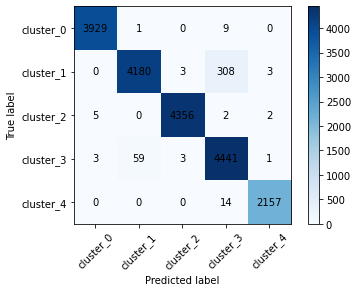

In [92]:
cm = confusion_matrix(y_train, predIdxs)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(target))
plt.xticks(tick_marks, target, rotation=45)
plt.yticks(tick_marks, target)

for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.show()

## Convolutional Neural Network

In [78]:
model = Sequential()
model.add(Embedding(vocab_size, embed_dim, input_length=maxlen, mask_zero=True))
model.add(Conv1D(128, 5, activation='relu', padding="valid"))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_clusters, activation='softmax'))

In [79]:
model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 300)          300000    
                                                                 
 conv1d_3 (Conv1D)           (None, 196, 128)          192128    
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 39, 128)           0         
 g1D)                                                            
                                                                 
 conv1d_4 (Conv1D)           (None, 35, 128)           82048     
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 7, 128)            0         
 g1D)                                                            
                                                                 
 conv1d_5 (Conv1D)           (None, 3, 128)           

In [81]:
model.fit(X_train, y_train, batch_size=50, epochs=10, validation_split=0.3, shuffle=True)

Epoch 1/5
273/273 [==============================] - 159s 573ms/step - loss: 0.5324 - accuracy: 0.7802 - val_loss: 0.1645 - val_accuracy: 0.9396
Epoch 2/5
273/273 [==============================] - 150s 549ms/step - loss: 0.1320 - accuracy: 0.9574 - val_loss: 0.1253 - val_accuracy: 0.9570
Epoch 3/5
273/273 [==============================] - 149s 546ms/step - loss: 0.0855 - accuracy: 0.9685 - val_loss: 0.1258 - val_accuracy: 0.9588
Epoch 4/5
273/273 [==============================] - 150s 551ms/step - loss: 0.0681 - accuracy: 0.9723 - val_loss: 0.1567 - val_accuracy: 0.9564
Epoch 5/5
273/273 [==============================] - 151s 552ms/step - loss: 0.0559 - accuracy: 0.9786 - val_loss: 0.2030 - val_accuracy: 0.9564


In [82]:
y_pred = model.predict(X_train)
y_pred

609/609 [==============================] - 55s 89ms/step


array([[1.00000000e+00, 8.27985251e-23, 8.57923114e-25, 2.12265671e-13,
        1.45764475e-20],
       [4.61299550e-07, 1.39249794e-04, 5.98649116e-11, 9.99860168e-01,
        1.89961966e-07],
       [1.36969450e-10, 2.42408937e-09, 1.25445094e-18, 1.00000000e+00,
        1.46820282e-11],
       ...,
       [3.98734797e-14, 1.05422892e-22, 7.87798334e-21, 3.93261516e-15,
        1.00000000e+00],
       [7.46471548e-12, 1.63490083e-10, 1.29494366e-20, 1.00000000e+00,
        3.52827012e-12],
       [1.00000000e+00, 4.38252623e-24, 1.44247728e-25, 4.07836411e-16,
        3.08084540e-22]], dtype=float32)

In [83]:
predIdxs = np.argmax(y_pred, axis=1)
print(classification_report(y_train, predIdxs,target_names=target))

              precision    recall  f1-score   support

   cluster_0       1.00      0.99      1.00      3939
   cluster_1       0.96      0.95      0.96      4494
   cluster_2       1.00      1.00      1.00      4365
   cluster_3       0.95      0.96      0.95      4507
   cluster_4       0.99      0.99      0.99      2171

    accuracy                           0.98     19476
   macro avg       0.98      0.98      0.98     19476
weighted avg       0.98      0.98      0.98     19476



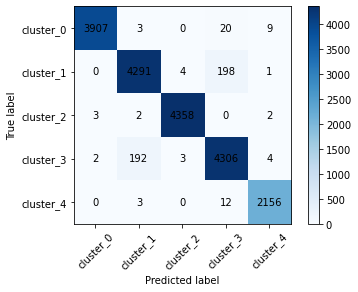

In [84]:
cm = confusion_matrix(y_train, predIdxs)

plt.imshow(cm,interpolation='none',cmap='Blues')
plt.colorbar()
tick_marks = np.arange(len(target))
plt.xticks(tick_marks, target, rotation=45)
plt.yticks(tick_marks, target)

for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.grid(False)
plt.show()